# Testing code for single temperature

In [1]:
using DifferentialEquations, Plots;

In [2]:
include("./Model.jl")

GLV_model! (generic function with 1 method)

In [3]:
# test parameters with dummy values
N = 5; # 5 species
T = 15+273.15; # 15 degrees
C0 = fill(0.5, N); # initial biomass as 0.5
tspan = (1,200); # time span

In [4]:
p = Params(N, T) # generating parameters

(N = 5, α = [-0.38136608120298465 -0.6944080065421505 … -0.3194839903424332 -0.24151779930496148; -0.42623004941548565 -0.2038249521707257 … -0.3922415787090685 -0.8704834662247194; … ; -0.6776982848383103 -0.14284477717266342 … -0.8177592546293225 -0.17374023446679054; -0.2993001909737719 -0.04779387674401452 … -0.4094836070436723 -0.27221839981750634], r = [0.1502484593619672, 0.12253552726035118, 0.14313544752779933, 0.1187317271484664, 0.13291826993656564])

In [7]:
p.α

5×5 Matrix{Float64}:
 -0.381366  -0.694408   -0.375171  -0.319484   -0.241518
 -0.42623   -0.203825   -0.199695  -0.392242   -0.870483
 -0.121858  -0.581194   -0.439361  -0.0214271  -0.415854
 -0.677698  -0.142845   -0.649189  -0.817759   -0.17374
 -0.2993    -0.0477939  -0.337836  -0.409484   -0.272218

In [5]:
# solving test
prob = ODEProblem(GLV_model!, C0, tspan, p);
sol = solve(prob, Tsit5());
sol.u

31-element Vector{Vector{Float64}}:
 [0.5, 0.5, 0.5, 0.5, 0.5]
 [0.46389500724273525, 0.46092573818794114, 0.47236994446801256, 0.4535361183495733, 0.4764967355905608]
 [0.3951959450350625, 0.3859660135192901, 0.41773252739164635, 0.3676883657500388, 0.4300518869096158]
 [0.32912082632298484, 0.3129744284520166, 0.36221669359971775, 0.2884727785700978, 0.38281009695265056]
 [0.27407213514037876, 0.2513060858639794, 0.31327161395728753, 0.22515766494625758, 0.3410229348620041]
 [0.2267294749011377, 0.197404303937237, 0.2687575960837641, 0.17274954877166648, 0.3028494654623809]
 [0.18962758579525069, 0.15429396500031628, 0.23190744786590345, 0.1329776984262702, 0.2711382232015671]
 [0.15958468640750048, 0.11838256959947602, 0.20042061150757814, 0.10144226316733855, 0.24407745216477145]
 [0.1370748616556998, 0.09026301112770341, 0.1754812802189527, 0.07786083018329244, 0.2229130000030671]
 [0.11997905677744332, 0.06725065813570118, 0.15528638042750845, 0.059354353413861416, 0.206396281145

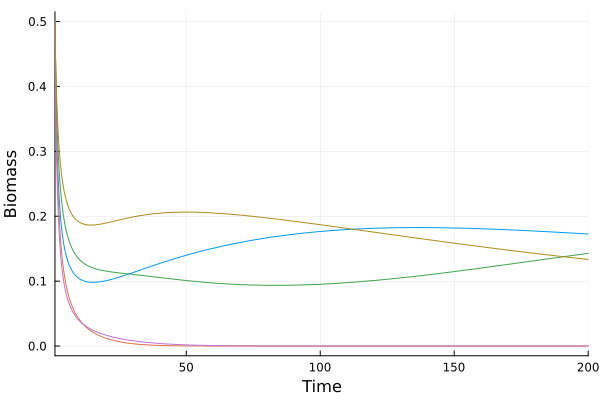

In [6]:
plot(sol, xaxis = "Time", yaxis = "Biomass", legend=false)

### Next steps: 

1) ramping temperatures function

2) add in realistic TPCs for r and α

### Questions:

1) paramerization for α? (for both $α_{ii}$ and $α_{ij}$)

2) How long should the time be for each ramping temperature? (Looking at how long it takes for a single strain to reach equilibrium to figure out?)